In [683]:
# Imported the needed libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [684]:
# Loaded the dataset
d= pd.read_csv('bank.csv',sep=';')   # replace with your actual filename
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [685]:
# Gained info about the dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [686]:
# Unique values in important columns
m=['job','marital','education','contact','poutcome']
for i in m:
    print(f"Unique values in {i} column are : ")
    print(d[i].unique())
    print()

Unique values in job column are : 
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Unique values in marital column are : 
['married' 'single' 'divorced']

Unique values in education column are : 
['primary' 'secondary' 'tertiary' 'unknown']

Unique values in contact column are : 
['cellular' 'unknown' 'telephone']

Unique values in poutcome column are : 
['unknown' 'failure' 'other' 'success']



In [687]:
# Info about the numeric columns
d.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [688]:
# Null rows, none found
d.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [689]:
# Duplicate rows, none found
d.duplicated().sum()

np.int64(0)

In [690]:
d['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [691]:
# Deleted the duration column as not needed in model training
d.drop('duration', axis=1, inplace=True)


In [692]:
# Encoded categorical variables
d_encoded = d.copy()
le = LabelEncoder()
for col in d_encoded.columns:
    if d_encoded[col].dtype == 'object':
        d_encoded[col] = le.fit_transform(d_encoded[col])
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no


In [693]:
# Defined the features and target variable
X = d_encoded.drop('y', axis=1)
y = d_encoded['y']


In [694]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [695]:
# Trained the model
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, random_state=42)

In [696]:
# Tested the model
y_pred = model.predict(X_test)


In [697]:
# Evaluated the model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.6185737976782753

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      1620
           1       0.15      0.56      0.23       189

    accuracy                           0.62      1809
   macro avg       0.54      0.59      0.49      1809
weighted avg       0.84      0.62      0.69      1809



Confusion Matrix:
 [[1014  606]
 [  84  105]]


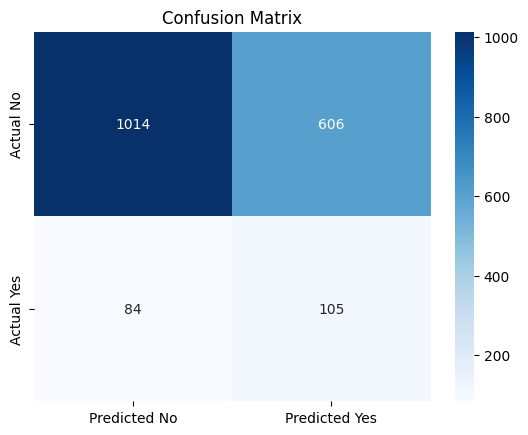

In [698]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.show()


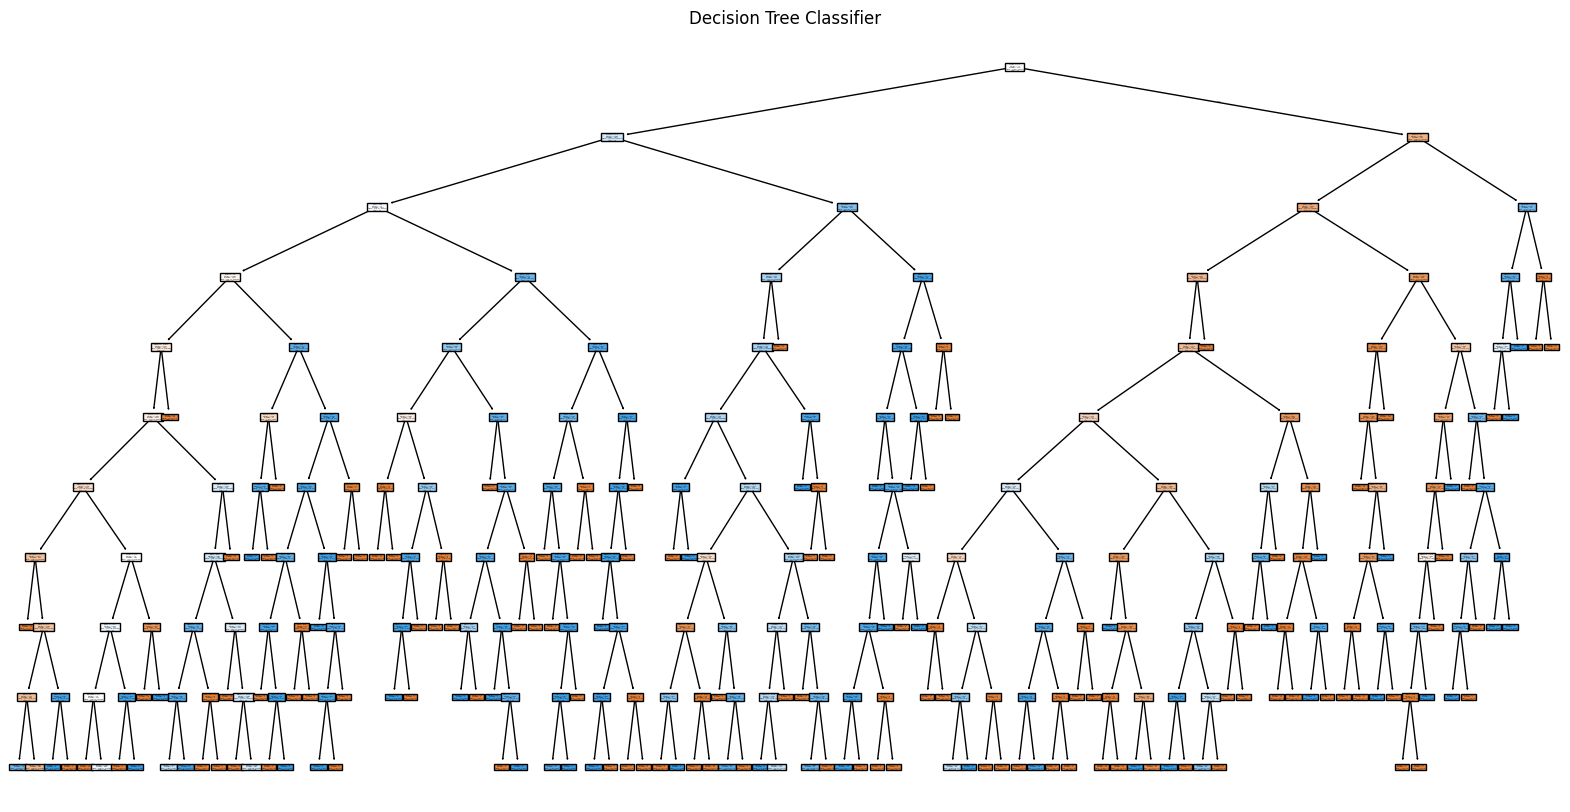

In [699]:
# Visualized the dataset
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()


**IMPLEMENTING THE MODEL**

In [700]:
# Defined the encoders dictionary
encoders = {}
for col in d.columns:
    if d[col].dtype == 'object':
        le = LabelEncoder()
        d[col] = le.fit_transform(d[col])
        encoders[col] = le

In [ ]:
# Defined the function with the model
def predict_from_user_input(model, encoders):
    print(" Enter the client's information:")
    user_input = {}
    user_input['age'] = int(input("Enter age: "))
    print('unemployed' ,'services' ,'management' ,'blue-collar', 'self-employed',
        'technician' ,'entrepreneur', 'admin.', 'student' ,'housemaid' ,'retired',
        'unknown',sep=',')
    user_input['job'] = input("Enter job (choose and enter from the list provided): ")
    user_input['marital'] = input("Enter marital status (single/married/divorced): ")
    user_input['education'] = input("Enter education (primary/secondary/tertiary/unknown): ")
    user_input['default'] = input("Has credit in default? (yes/no): ")
    user_input['balance'] = int(input("Enter average yearly balance (in euros): "))
    user_input['housing'] = input("Has housing loan? (yes/no): ")
    user_input['loan'] = input("Has personal loan? (yes/no): ")
    user_input['contact'] = input("Contact type (cellular/telephone/unknown): ")
    user_input['day'] = input("Date of last contact: ")
    user_input['month'] = input("Month of contact (first 3 letters of the month): ")
    user_input['campaign'] = int(input("Number of contacts during this campaign: "))
    user_input['pdays'] = int(input("Days since last contact (-1 if never contacted): "))
    user_input['previous'] = int(input("Number of previous contacts: "))
    user_input['poutcome'] = input("Previous campaign outcome (success/failure/other/unknown): ")
    user_df = pd.DataFrame([user_input])
    for col in user_df.columns:
        if col in encoders:
            user_df[col] = encoders[col].transform(user_df[col])
    prediction = model.predict(user_df)[0]
    print("\nPrediction Result:")
    x=pd.DataFrame([user_input])
    if prediction == 1:
        print("\nUser Input Summary:\n")
        print(x.to_string(index=False))
        print("\nThe client WILL SUBSCRIBE to a term deposit.")
    else:
        print("\nUser Input Summary:\n")
        print(x.to_string(index=False))
        print("\nThe client WILL NOT subscribe to a term deposit.")


In [702]:
predict_from_user_input(model, encoders)

 Enter the client's information:
unemployed,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired,unknown

Prediction Result:

User Input Summary:

 age        job marital education default  balance housing loan  contact day month  campaign  pdays  previous poutcome
  54 management  single  tertiary      no     3000      no  yes cellular   5   aug         3      3         3    other
The client WILL SUBSCRIBE to a term deposit.
